In [1]:
# Google Drive'ı bağlamak için Google Colab arayüzü üzerinde bağlanma
from google.colab import drive

# Drive'ı /content/drive/ konumuna  mount ediyoruz
drive.mount('/content/drive')

Mounted at /content/drive


# KEŞİFSEL VERİ ANALİZİ

In [2]:
# Pandas kütüphanesi ile CSV dosyasını okuma
import pandas as pd

# Dosya yolunu belirttiğimiz değşkene atama
file_path = '/content/drive/MyDrive/tekrarDers/enhanced_anxiety_dataset.csv'

# CSV dosyasını oku ve bir DataFrame olarak kaydet
df = pd.read_csv(file_path)

In [3]:
# Veri setindeki satır ve sütun sayısını gösterme
print("Veri seti boyutu {satır, sütun}: ", df.shape)

Veri seti boyutu {satır, sütun}:  (11000, 19)


In [8]:
# İlk 5 satırı görüntüleme, veri setinin yapısıyla ilgili temel değişkenleri görüntülememizi sağlar
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [9]:
# Veri tipi ve eksik değerleri gösterir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

 **Değişken Açıklama Tabosu**

1.  Age: Katılımcının yaşı (tam sayı)
2.  Gender: Katılımcının cinsiyeti (Female, Male, Other)
3.  Occupation: Meslek grubu (Student, Engineer, Doctor)
4.  Sleep Hours: Günlük ortalama uyku süresi (saat cinsinden)
5.  Physical Activity (hrs/week): Haftalık fiziksel aktivite süresi (saat cinsinden)
6.  Caffeine Intake(mg/day): Günlük kafein tüketimi (miligram cinsinden)
7.  Alcohol Consumption (drinks/week): Haftalık alkol tüketim miktarı (içecek sayısı)
8.  Smoking: Sigra Kullanımı (Yes/No)
9.  Family History of Anxiety:  Ailede anksiyete öyküsü var mı (yes/no)
10. Stress Level (1-10): Kişinin bildirdiği stres seviyesi(1=az, 10=çok yüksek)
11. Heart Rate(breaths/min): Dakikada nefes alma sayısı
12. Sweating Level (1-5): Terleme düzeyi(1=az, 5=çok)
13. Dizziness: Baş dönmesi yaşıyor mu (yes/no)
14. Medication: Herhangi bir ilaç kullanımı mevcut mu (yes/no)
15. Therapy Sessions (per month): Aylık terapi seansı
16. Recent Major Lİfe Event: Yakın zamanda büyük bir yaşam olayı yaşadı mı (yes/no)
17. Diet Quality (1-10): Beslenme kalitesi (1=kötü, 10=çok iyi)
18. Anxiety Level(1-10): Anksiyete seviyesi (hedef değişken -1=az, 10=çok yüksek)


**Gözlemler**

*   Veri setinde eksik değer bulunmuyor
*   Sayısal verileri normalize edilmeye uygun
*   Kategorik verilerde yes/no formatında etiketle mevcut; bunlar ikili kodlamaya(encoding) uygundur
*   Bazı kategoriler (occupation) yüksek kardinaliteye sahip, bu durum model karmaşıklığını arttırabilir





In [10]:
# Veri tiplerine göre sütunları sınıflandır
sayisal = df.select_dtypes(include=['int64', 'float64']).columns.tolist() #int64 ya da float64'ü içeren veri tiplerini listele demektir, dtypes'ı öyle okudu
kategorik = df.select_dtypes(include='object').columns.tolist()

print("Sayısal değişkenler:", sayisal)
print("Kategorik değişkenler:", kategorik)

Sayısal değişkenler: ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Therapy Sessions (per month)', 'Diet Quality (1-10)', 'Anxiety Level (1-10)']
Kategorik değişkenler: ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']


In [11]:
# Sayısal değişkenlerin temel istatistikleri: ortalama, std, min, max vb.
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


**Genel Değerlendirme**
* Veri dağılımı dengeli, ancak birçok değşikende uç değerler gözlemlenmekte. Bu durum model eğitimi sırasında normalleştirme veya uç değer yönetimi gerektirebilir
* Stres, uyku, fiziksel aktivite, beslenme ve terapi gibi gibi faktörlerin anksiyete seviyeleriyle ilişkilendirilebilir potansiyel göstergeler olduğu görülüyor
* Caffeine ve Alcohol gibi maddelerin yüksek tüketimi, özellikle dikkatle incelenmesli

In [12]:
df.sample(10)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
1900,59,Female,Musician,6.3,5.3,78,15,Yes,Yes,9,71,12,3,No,No,0,Yes,7,5.0
9344,53,Male,Musician,7.5,4.5,250,9,No,No,8,63,14,4,Yes,No,1,Yes,5,3.0
7499,55,Other,Musician,6.3,1.5,278,17,Yes,Yes,8,75,17,3,Yes,No,3,Yes,10,4.0
2551,30,Male,Student,5.3,1.3,342,16,Yes,No,1,66,17,2,No,Yes,0,Yes,8,1.0
8743,20,Male,Artist,8.3,2.4,142,10,No,No,7,97,20,1,No,Yes,3,Yes,1,2.0
5368,41,Male,Nurse,5.6,2.6,373,0,No,No,8,114,17,5,Yes,Yes,2,Yes,4,4.0
8737,33,Female,Musician,6.6,3.4,260,13,Yes,Yes,10,115,14,1,Yes,No,3,No,5,6.0
9333,31,Female,Musician,3.9,0.8,429,8,Yes,Yes,8,106,20,5,Yes,No,7,Yes,3,8.0
10177,33,Male,Nurse,7.2,1.7,184,9,Yes,Yes,6,101,13,3,No,No,3,Yes,1,3.0
1269,55,Female,Doctor,8.2,1.4,400,5,No,No,5,98,13,2,No,Yes,0,Yes,6,3.0


In [13]:
# her sütundaki benzersiz değer sayılarını verir
df.nunique()

,0
Age,47
Gender,3
Occupation,13
Sleep Hours,82
Physical Activity (hrs/week),100
Caffeine Intake (mg/day),600
Alcohol Consumption (drinks/week),20
Smoking,2
Family History of Anxiety,2
Stress Level (1-10),10


In [14]:
# Eksik veri sayısını ve oranlarını hesapla
eksik_sayisi = df.isnull().sum()
eksik_orani = (eksik_sayisi / len(df)) * 100
eksik_df = pd.DataFrame({'Eksik Veri Sayısı': eksik_sayisi, 'Eksik Veri Oranı (%)': eksik_orani})
eksik_df

,Eksik Veri Sayısı,Eksik Veri Oranı (%)
Age,0,0.0
Gender,0,0.0
Occupation,0,0.0
Sleep Hours,0,0.0
Physical Activity (hrs/week),0,0.0
Caffeine Intake (mg/day),0,0.0
Alcohol Consumption (drinks/week),0,0.0
Smoking,0,0.0
Family History of Anxiety,0,0.0
Stress Level (1-10),0,0.0


**Yorum**
* Tüm değişkenlerde 0 eksik değer → eksik veri görünürde yok.
* Bu, veri hazırlama aşamasını kolaylaştırır ve model başarısına olumlu katkı sağlar.

Ancak bununla yetinilmemelidir. " " (boşluk), "unknown", "NaN" gibi gizli eksiklikler, özellikle string türündeki değişkenlerde (örn. Gender, Occupation, Smoking) gözden kaçabilir.


**Stratejik Çıkarım**

* Görünürde eksik veri olmaması olumlu.

* Ancak veri kalitesi (data quality) açısından kategorik alanlarda bilinmeyen, eksik veya anlam ifade etmeyen etiketlerin kontrolü zorunludur.

* Bu tür bir kontrol özellikle Gender, Occupation, Medication, Recent Major Life Event gibi sütunlar için önem arz eder.

# Veri Görselleştirme

In [15]:
# Yaş grubunu belirleyen fonksiyon
def yas_grubu_belirle(yas):
    if yas <= 12:
        return "Çocuk"
    elif 13 <= yas <= 17:
        return "Ergen"
    elif 18 <= yas <= 25:
        return "Genç"
    elif 26 <= yas <= 40:
        return "Yetişkin"
    elif 41 <= yas <= 60:
        return "Orta Yaş"
    else:
        return "İleri Yaş"

# Yeni sütunu oluştur
df["Yaş Grubu"] = df["Age"].apply(yas_grubu_belirle)

# Kontrol için ilk satırları göster
df[["Age", "Yaş Grubu"]].head()

,Age,Yaş Grubu
0,29,Yetişkin
1,46,Orta Yaş
2,64,İleri Yaş
3,20,Genç
4,49,Orta Yaş


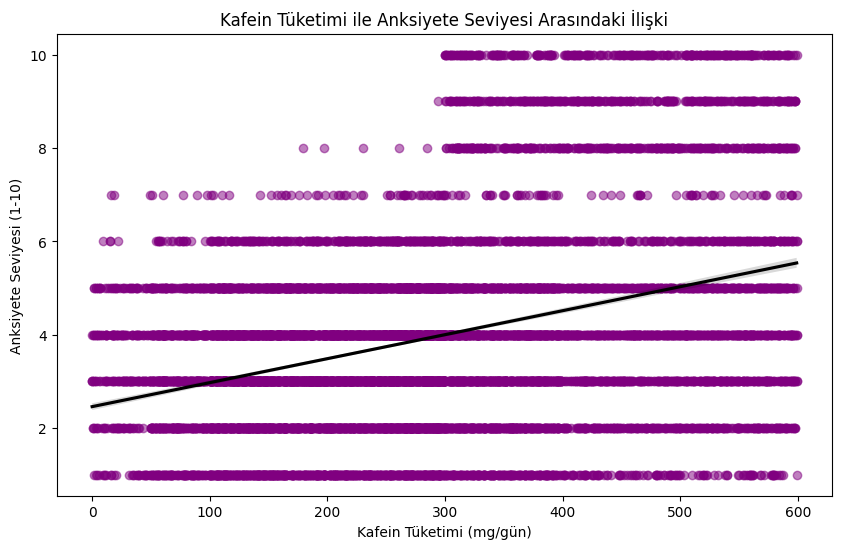

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.regplot(x='Caffeine Intake (mg/day)', y='Anxiety Level (1-10)', data=df, scatter_kws={'alpha':0.5, 'color':'purple'}, line_kws={'color':'black'})
plt.title('Kafein Tüketimi ile Anksiyete Seviyesi Arasındaki İlişki')
plt.xlabel('Kafein Tüketimi (mg/gün)')
plt.ylabel('Anksiyete Seviyesi (1-10)')
plt.show()


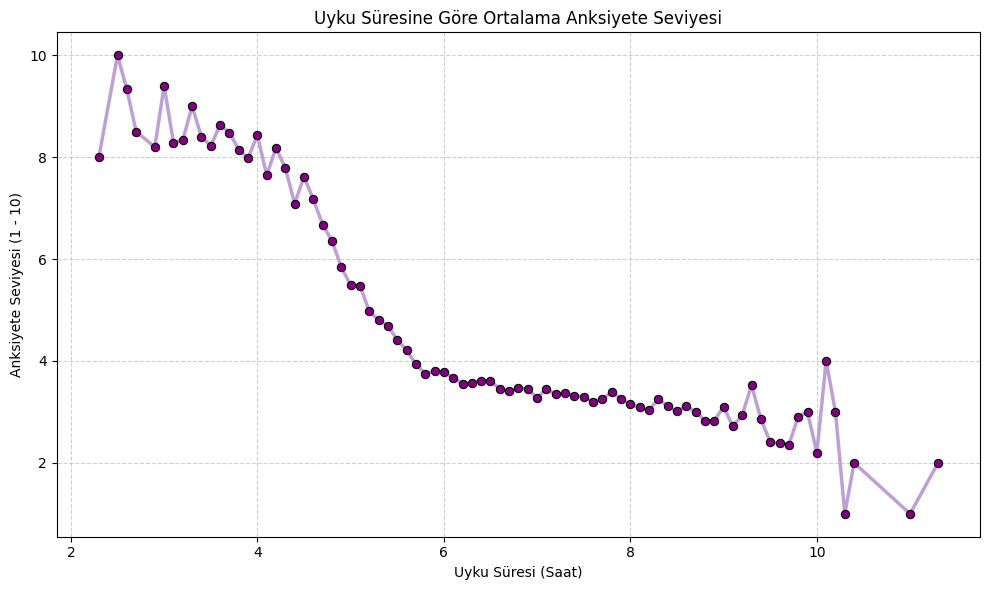

In [17]:
# Uyku saatlerini grupla ve ortalama anksiyeteyi hesapla
df_grouped = df.groupby('Sleep Hours')['Anxiety Level (1-10)'].mean().reset_index()

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Sleep Hours',
    y='Anxiety Level (1-10)',
    data=df_grouped,
    marker='o',
    color='#BFA0D4',
    linewidth=2.5,
    markerfacecolor='purple',
    markeredgecolor='black'
)

plt.title('Uyku Süresine Göre Ortalama Anksiyete Seviyesi')
plt.xlabel('Uyku Süresi (Saat)')
plt.ylabel('Anksiyete Seviyesi (1 - 10)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-18-df376f91901c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Yaş Grubu", y="Caffeine Intake (mg/day)", palette="Purples", ax=axes[0])
<ipython-input-18-df376f91901c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Yaş Grubu", y="Anxiety Level (1-10)", palette="Purples", ax=axes[1])


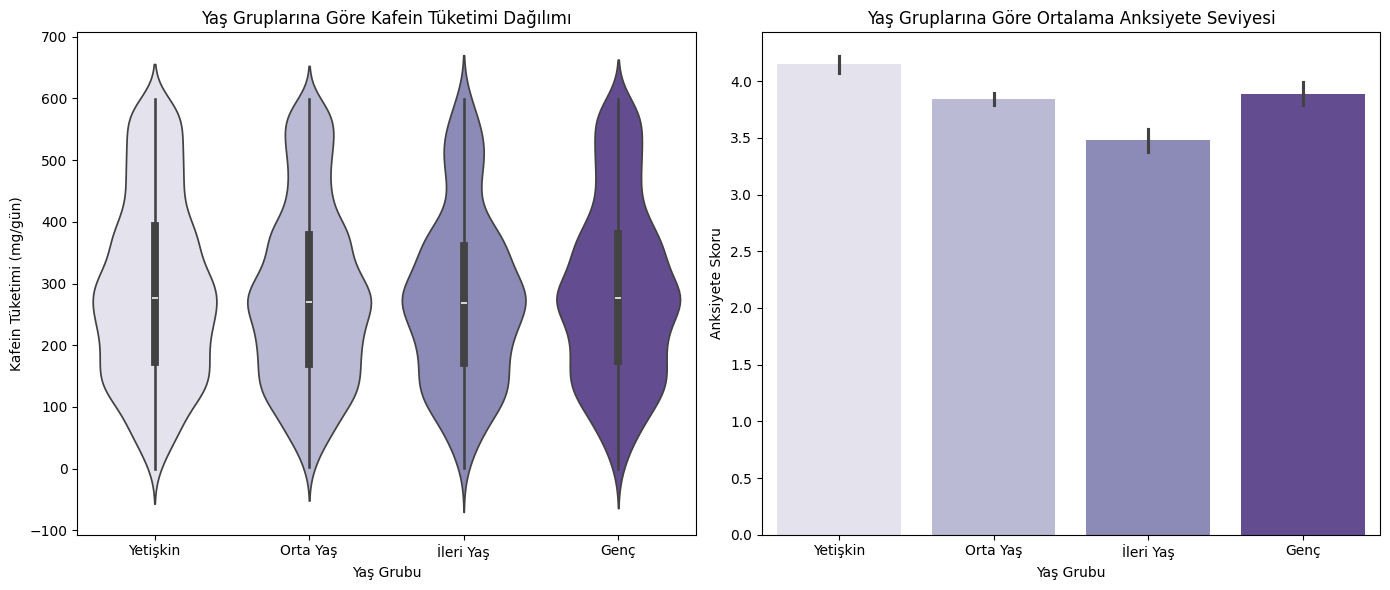

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yeni bir figür başlat
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 satır, 2 sütun

# 1. Violin Plot
sns.violinplot(data=df, x="Yaş Grubu", y="Caffeine Intake (mg/day)", palette="Purples", ax=axes[0])
axes[0].set_title("Yaş Gruplarına Göre Kafein Tüketimi Dağılımı")
axes[0].set_xlabel("Yaş Grubu")
axes[0].set_ylabel("Kafein Tüketimi (mg/gün)")

# 2. Bar Plot
sns.barplot(data=df, x="Yaş Grubu", y="Anxiety Level (1-10)", palette="Purples", ax=axes[1])
axes[1].set_title("Yaş Gruplarına Göre Ortalama Anksiyete Seviyesi")
axes[1].set_xlabel("Yaş Grubu")
axes[1].set_ylabel("Anksiyete Skoru")

plt.tight_layout()
plt.show()



<ipython-input-19-a248dc8c88fc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diet_Quality_Level', y='Anxiety Level (1-10)', data=df, palette="Purples")


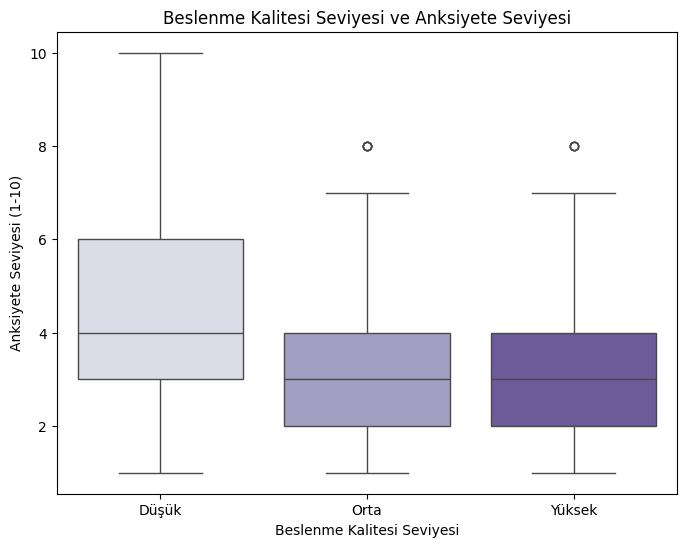

In [19]:
df['Diet_Quality_Level'] = pd.cut(df['Diet Quality (1-10)'], bins=[0,4,7,10], labels=['Düşük', 'Orta', 'Yüksek'])

plt.figure(figsize=(8,6))
sns.boxplot(x='Diet_Quality_Level', y='Anxiety Level (1-10)', data=df, palette="Purples")
plt.title('Beslenme Kalitesi Seviyesi ve Anksiyete Seviyesi')
plt.xlabel('Beslenme Kalitesi Seviyesi')
plt.ylabel('Anksiyete Seviyesi (1-10)')
plt.show()


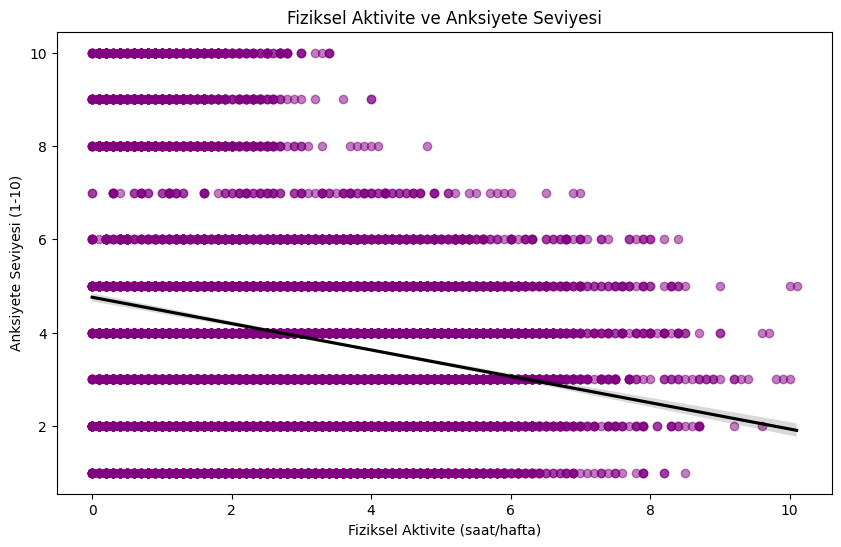

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.regplot(x='Physical Activity (hrs/week)', y='Anxiety Level (1-10)', data=df, scatter_kws={'alpha':0.5, 'color':'purple'}, line_kws={'color':'black'})
plt.title('Fiziksel Aktivite ve Anksiyete Seviyesi')
plt.xlabel('Fiziksel Aktivite (saat/hafta)')
plt.ylabel('Anksiyete Seviyesi (1-10)')
plt.show()


<ipython-input-21-3c72a8bf66c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Smoking', y='Anxiety Level (1-10)', data=df, palette='Purples')


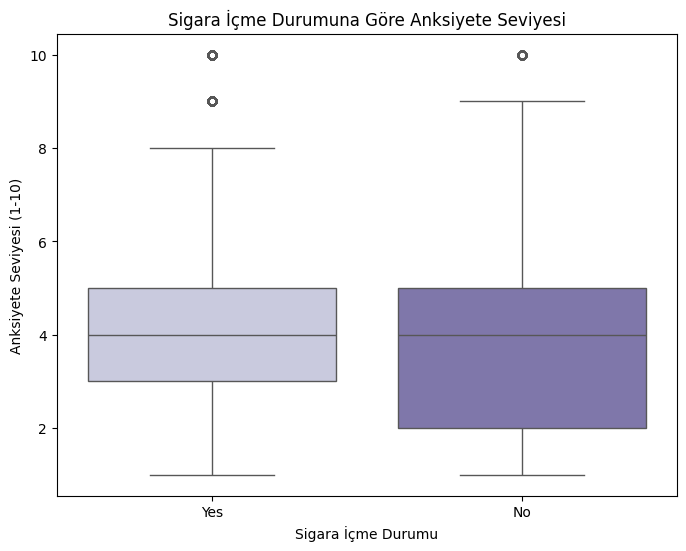

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Smoking', y='Anxiety Level (1-10)', data=df, palette='Purples')

plt.title('Sigara İçme Durumuna Göre Anksiyete Seviyesi')
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Anksiyete Seviyesi (1-10)')
plt.show()

<ipython-input-22-559fe9b605d3>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Stress Level (1-10)'], label='Stres', shade=True, color='purple')
<ipython-input-22-559fe9b605d3>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Anxiety Level (1-10)'], label='Anksiyete', shade=True, color='#A0A0A0')


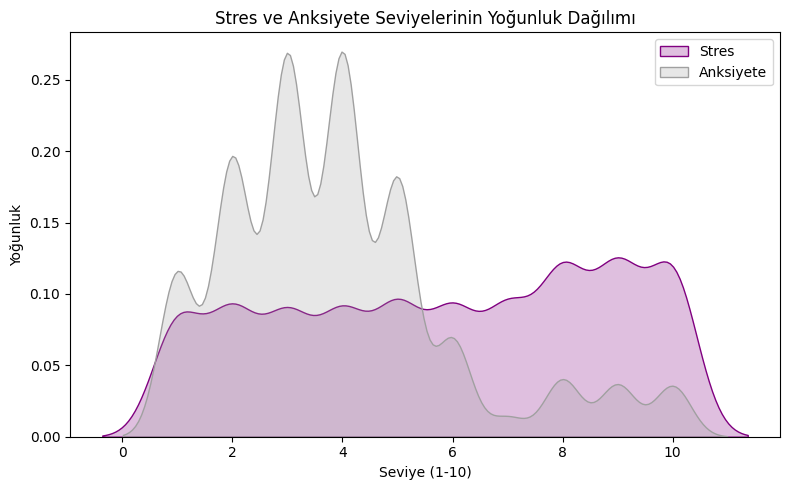

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Stres seviyesi yoğunluk grafiği (açık mavi)
sns.kdeplot(df['Stress Level (1-10)'], label='Stres', shade=True, color='purple')

# Anksiyete seviyesi yoğunluk grafiği (açık yeşil)
sns.kdeplot(df['Anxiety Level (1-10)'], label='Anksiyete', shade=True, color='#A0A0A0')

plt.title('Stres ve Anksiyete Seviyelerinin Yoğunluk Dağılımı')
plt.xlabel('Seviye (1-10)')
plt.ylabel('Yoğunluk')
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
import plotly.express as px

# Pastel tonlarında mor, gri ve lacivert renklerini manuel olarak belirliyoruz
pastel_colors = ['#BFA0D4', '#A0A0A0', '#4F6D7A']  # Pastel mor, gri ve lacivert

fig = px.box(
    df,
    x="Yaş Grubu",
    y="Sleep Hours",
    color="Yaş Grubu",
    title="Yaş Grubuna Göre Uyku Süresi Dağılımı",
    labels={"Sleep Hours": "Uyku Süresi (saat)", "Yaş Grubu": "Yaş Grubu"},
    color_discrete_sequence=pastel_colors  # Pastel renkler
)

fig.show()



<ipython-input-24-a301a8e6a50c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




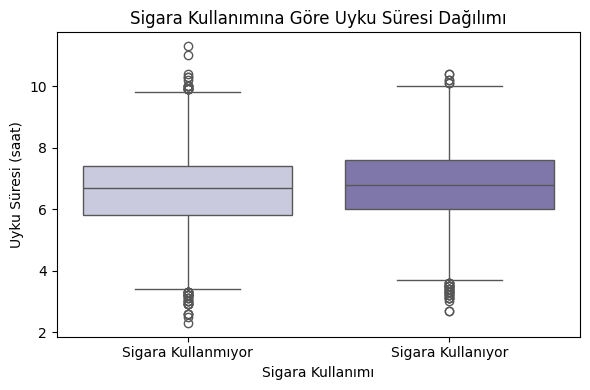

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Smoking", y="Sleep Hours", palette="Purples")

plt.xticks([0, 1], ["Sigara Kullanmıyor", "Sigara Kullanıyor"])
plt.title("Sigara Kullanımına Göre Uyku Süresi Dağılımı")
plt.ylabel("Uyku Süresi (saat)")
plt.xlabel("Sigara Kullanımı")
plt.tight_layout()
plt.show()


✅ Sigara içmeyenler daha uzun uyuyorsa:
Bu, sigara içmenin uyku süresini olumsuz etkileyebileceğini gösterir.

Nikotin uyarıcı bir madde olduğundan, uykuya dalma süresini artırabilir ve gece uyanmalarına neden olabilir.

Uyku kalitesinin de düşük olması olasıdır (grafik uyku süresini gösterse de kaliteye dair dolaylı bilgi verebilir).

✅ Sigara içenler daha uzun uyuyorsa (nadirdir ama olabilir):
Bu durumda diğer değişkenler (örneğin anksiyete, stres, depresyon, ilaç kullanımı gibi) devreye giriyor olabilir.

Sigara içen bireylerin psikolojik baskı sebebiyle daha fazla uykuya ihtiyaç duyması mümkün.

✅ İki grup arasında anlamlı bir fark yoksa:
Sigara kullanımının uyku süresi üzerinde doğrudan bir etkisi olmadığı yorumlanabilir.

Ancak bu durum yine de uyku kalitesini bozabileceği için, sadece süreye bakmak yetersiz kalabilir.

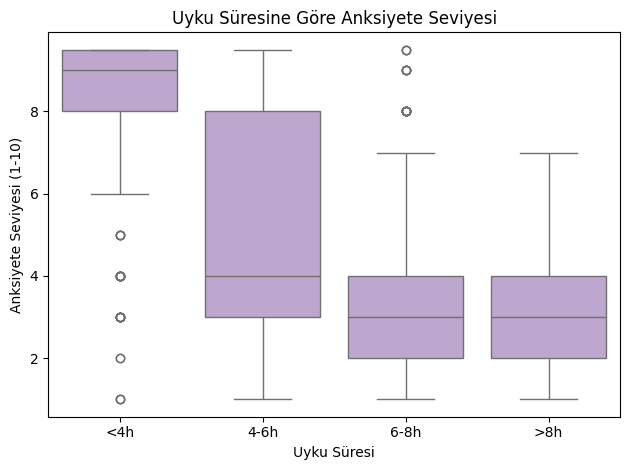

In [ ]:
# Uyku aralıklarını kategorilere ayıralım
df['Sleep Category'] = pd.cut(df['Sleep Hours'], bins=[0, 4, 6, 8, 10], labels=['<4h', '4-6h', '6-8h', '>8h'])

# Boxplot çizimi (yeşil tonla)
sns.boxplot(
    x='Sleep Category',
    y='Anxiety Level (1-10)',
    data=df,
    color='#BFA0D4'  # Açık yeşil ton
)

plt.title('Uyku Süresine Göre Anksiyete Seviyesi')
plt.xlabel('Uyku Süresi')
plt.ylabel('Anksiyete Seviyesi (1-10)')
plt.tight_layout()
plt.show()


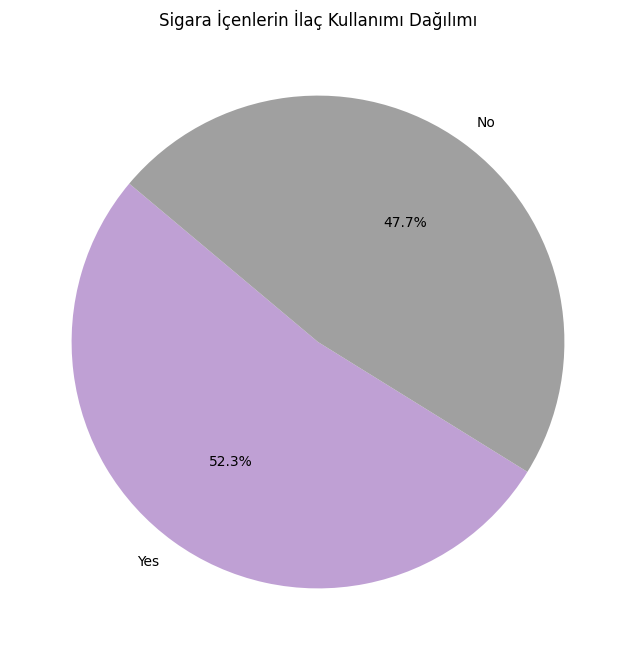

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setinde 'Smoking' sütununda sigara içenleri filtrele (örneğin "Yes" olarak varsayıyorum)
smokers = df[df['Smoking'].str.lower() == 'yes']

# Medication sütunundaki dağılımı say
med_counts = smokers['Medication'].value_counts()

# Pastel tonlarında mor ve gri renkler
pastel_colors = ['#BFA0D4', '#A0A0A0']  # Pastel mor ve gri tonları

# Pasta grafiği ile görselleştirme
plt.figure(figsize=(8,8))
med_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title('Sigara İçenlerin İlaç Kullanımı Dağılımı')
plt.ylabel('')
plt.show()



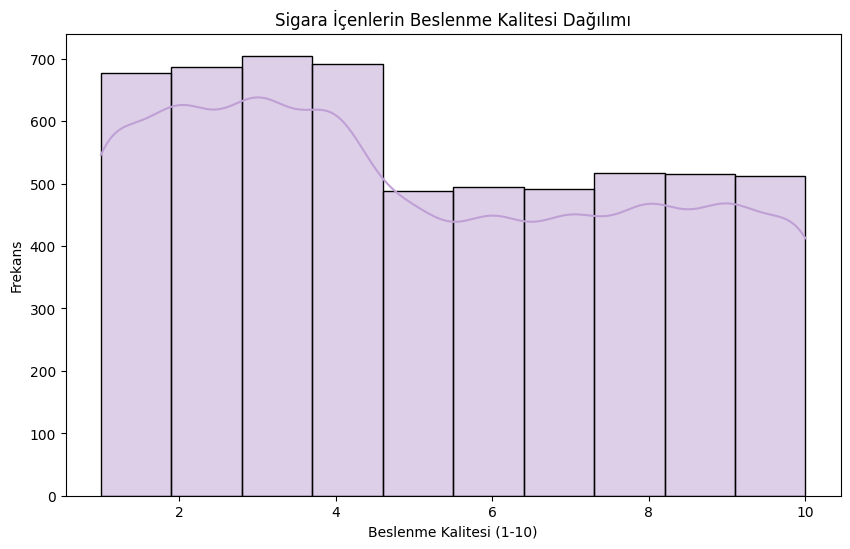

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sigara içenleri filtrele
smokers = df[df['Smoking'].str.lower() == 'yes']

plt.figure(figsize=(10,6))
sns.histplot(smokers['Diet Quality (1-10)'], kde=True, bins=10, color='#BFA0D4')
plt.title('Sigara İçenlerin Beslenme Kalitesi Dağılımı')
plt.xlabel('Beslenme Kalitesi (1-10)')
plt.ylabel('Frekans')
plt.show()


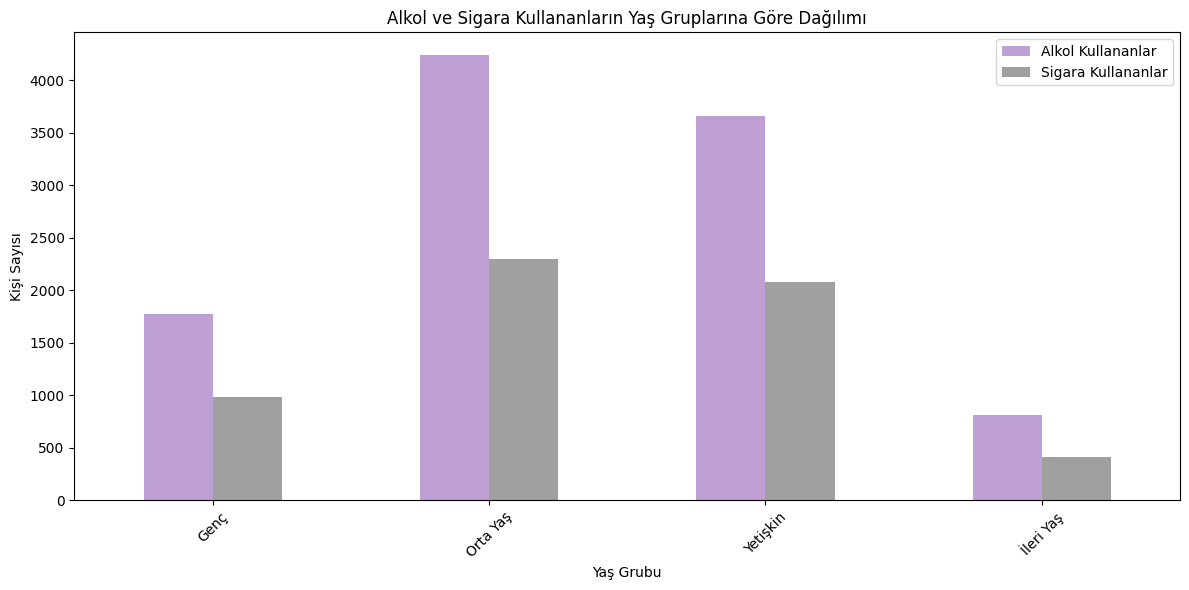

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Alkol kullananları filtrele
alcohol_users = df[df['Alcohol Consumption (drinks/week)'] > 0]  # Alkol_Bin sütununa göre alkol kullananlar (1 veya üzeri ise)

# Sigara kullananları filtrele
smokers = df[df['Smoking'].str.lower() == 'yes']

# Yaş grubuna göre sayıları al
alcohol_age_counts = alcohol_users['Yaş Grubu'].value_counts().sort_index()
smokers_age_counts = smokers['Yaş Grubu'].value_counts().sort_index()

# DataFrame oluştur
age_groups = sorted(df['Yaş Grubu'].unique())
data = pd.DataFrame({
    'Alkol Kullananlar': alcohol_age_counts.reindex(age_groups, fill_value=0),
    'Sigara Kullananlar': smokers_age_counts.reindex(age_groups, fill_value=0)
})

# Yan yana bar grafiği
data.plot(kind='bar', figsize=(12,6), color=['#BFA0D4', '#A0A0A0'])
plt.title('Alkol ve Sigara Kullananların Yaş Gruplarına Göre Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


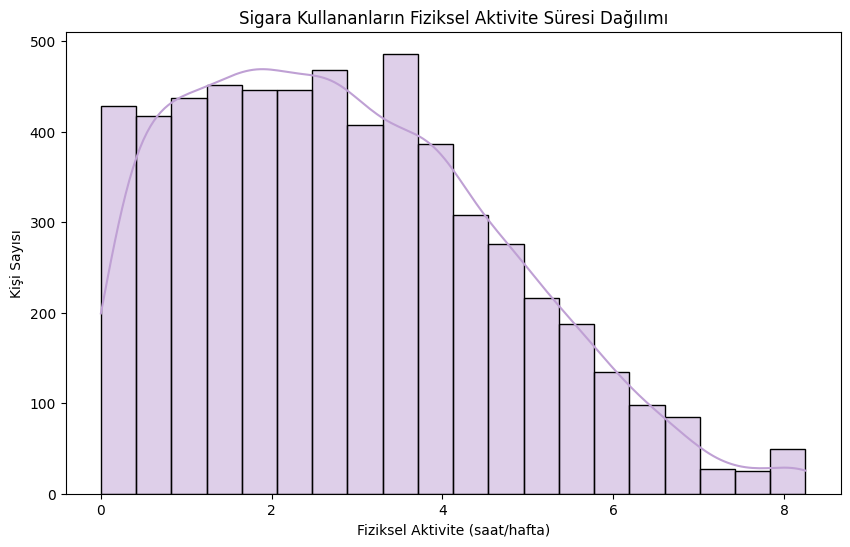

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sigara içenleri filtrele
smokers = df[df['Smoking'].str.lower() == 'yes']

# 1. Histogram
plt.figure(figsize=(10,6))
sns.histplot(smokers['Physical Activity (hrs/week)'], bins=20, kde=True, color='#BFA0D4')
plt.title('Sigara Kullananların Fiziksel Aktivite Süresi Dağılımı')
plt.xlabel('Fiziksel Aktivite (saat/hafta)')
plt.ylabel('Kişi Sayısı')
plt.show()



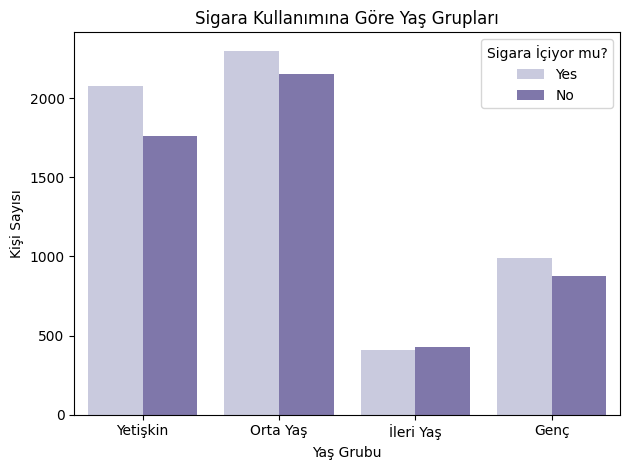

In [ ]:
sns.countplot(data=df,
              x='Yaş Grubu',
              hue='Smoking',
              palette='Purples')
plt.title('Sigara Kullanımına Göre Yaş Grupları')
plt.xlabel('Yaş Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Sigara İçiyor mu?')
plt.tight_layout(); plt.show()

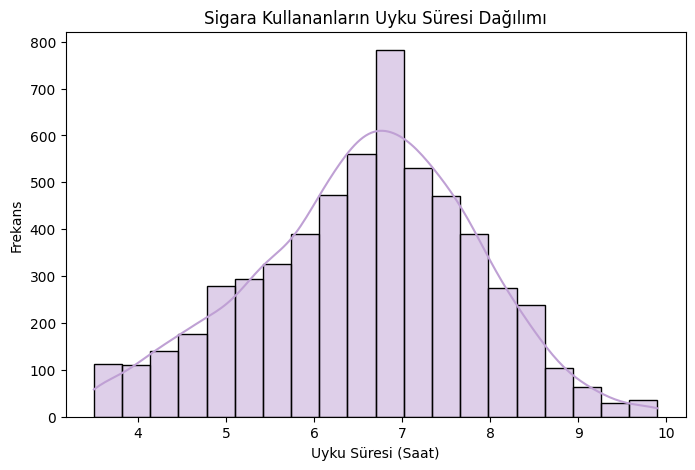

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sigara içenleri filtrele
smokers = df[df['Smoking'] == 'Yes']

plt.figure(figsize=(8,5))
sns.histplot(smokers['Sleep Hours'], bins=20, kde=True, color='#BFA0D4')

plt.title('Sigara Kullananların Uyku Süresi Dağılımı')
plt.xlabel('Uyku Süresi (Saat)')
plt.ylabel('Frekans')
plt.show()


# VERİ ÖN İŞLEME

In [ ]:
df.isnull().sum()
# sleep category de 12 veri eksikliği var

,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0
Stress Level (1-10),0


In [ ]:
# Bu aşamada yaş grubunu siliyorum çünkü, encoding işleminde işimi zorlaştıracak. Silmem benim veri analizimde herhangi bir soruna yer açmaz çünkü elimde yaş değişkeni var
df.drop("Yaş Grubu", axis=1, inplace=True)

In [ ]:
#  En sık geçen kategoriyi bul
most_common = df["Sleep Category"].mode()[0]

#  Eksik kategoriyi bu kategori ile doldur
df["Sleep Category"] = df["Sleep Category"].fillna(most_common)

In [ ]:
def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    outlier_summary = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)

    return pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Aykırı Değer Sayısı']).sort_values(by='Aykırı Değer Sayısı', ascending=False)

# Aykırı değerleri say ve yazdır
outlier_counts = detect_outliers_iqr(df)
print(outlier_counts)

                                   Aykırı Değer Sayısı
Anxiety Level (1-10)                               322
Therapy Sessions (per month)                       178
Sleep Hours                                        110
Physical Activity (hrs/week)                        56
Caffeine Intake (mg/day)                             0
Age                                                  0
Alcohol Consumption (drinks/week)                    0
Stress Level (1-10)                                  0
Breathing Rate (breaths/min)                         0
Heart Rate (bpm)                                     0
Sweating Level (1-5)                                 0
Diet Quality (1-10)                                  0


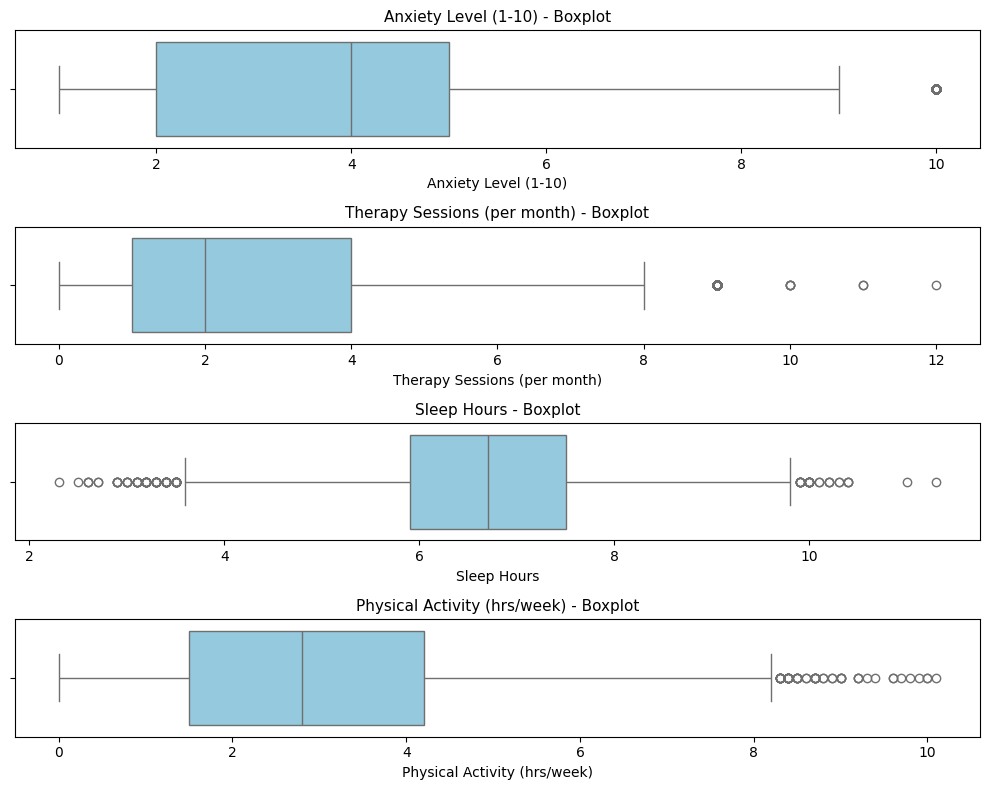

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aykırı değer içeren değişkenleri listele
outlier_cols = [
    'Anxiety Level (1-10)',
    'Therapy Sessions (per month)',
    'Sleep Hours',
    'Physical Activity (hrs/week)'
]

# Her değişken için boxplot oluştur
plt.figure(figsize=(10, 8))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(len(outlier_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} - Boxplot', fontsize=11)
    plt.tight_layout()

plt.show()

In [ ]:
# Aykırı verilerin temizlenmesi
import pandas as pd

# Temizlenecek sütunlar
columns_to_fix = [
    'Anxiety Level (1-10)',
    'Therapy Sessions (per month)',
    'Sleep Hours',
    'Physical Activity (hrs/week)'
]

# IQR yöntemiyle aykırı değerleri sınırlar ile değiştir
for col in columns_to_fix:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Alt sınırdan küçükse alt sınıra eşitle, üst sınırdan büyükse üst sınıra eşitle
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [ ]:
# Label Encoding - sadece ikili değişkenler için
import pandas as pd
binary_cols = {'Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event'}
for col in binary_cols:
  df[col] = df[col].map({'Yes':1, 'No':0})

# One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender', 'Occupation'], drop_first=True)

In [ ]:
# 2. Sleep Category (ordinal encoding - çünkü sıralı anlamı var):
sleep_map = {"4-6h": 1, "6-8h": 2, "8-10h": 3}
df["Sleep Category"] = df["Sleep Category"].map(sleep_map)

In [ ]:
def label_anxiety(x):
    if x <= 3:
        return 'Low'
    elif x <= 6:
        return 'Moderate'
    else:
        return 'High'

df["Anxiety_Class"] = df["Anxiety Level (1-10)"].apply(label_anxiety)

# .apply() fonksiyonu, verilen fonksiyonu, bir Pandas serisinin her satırına tek tek uygular.
# ölçekleme yapmadan önce sınıflandırma yapmalısın

In [ ]:
print(df["Anxiety_Class"].value_counts())

Anxiety_Class
Low         5202
Moderate    4661
High        1137
Name: count, dtype: int64


In [ ]:
df["Anxiety_Class"] = df["Anxiety_Class"].map({'Low': 0, 'Moderate': 1, 'High': 2})

In [ ]:
df = df.drop(columns=['Diet_Quality_Level'])

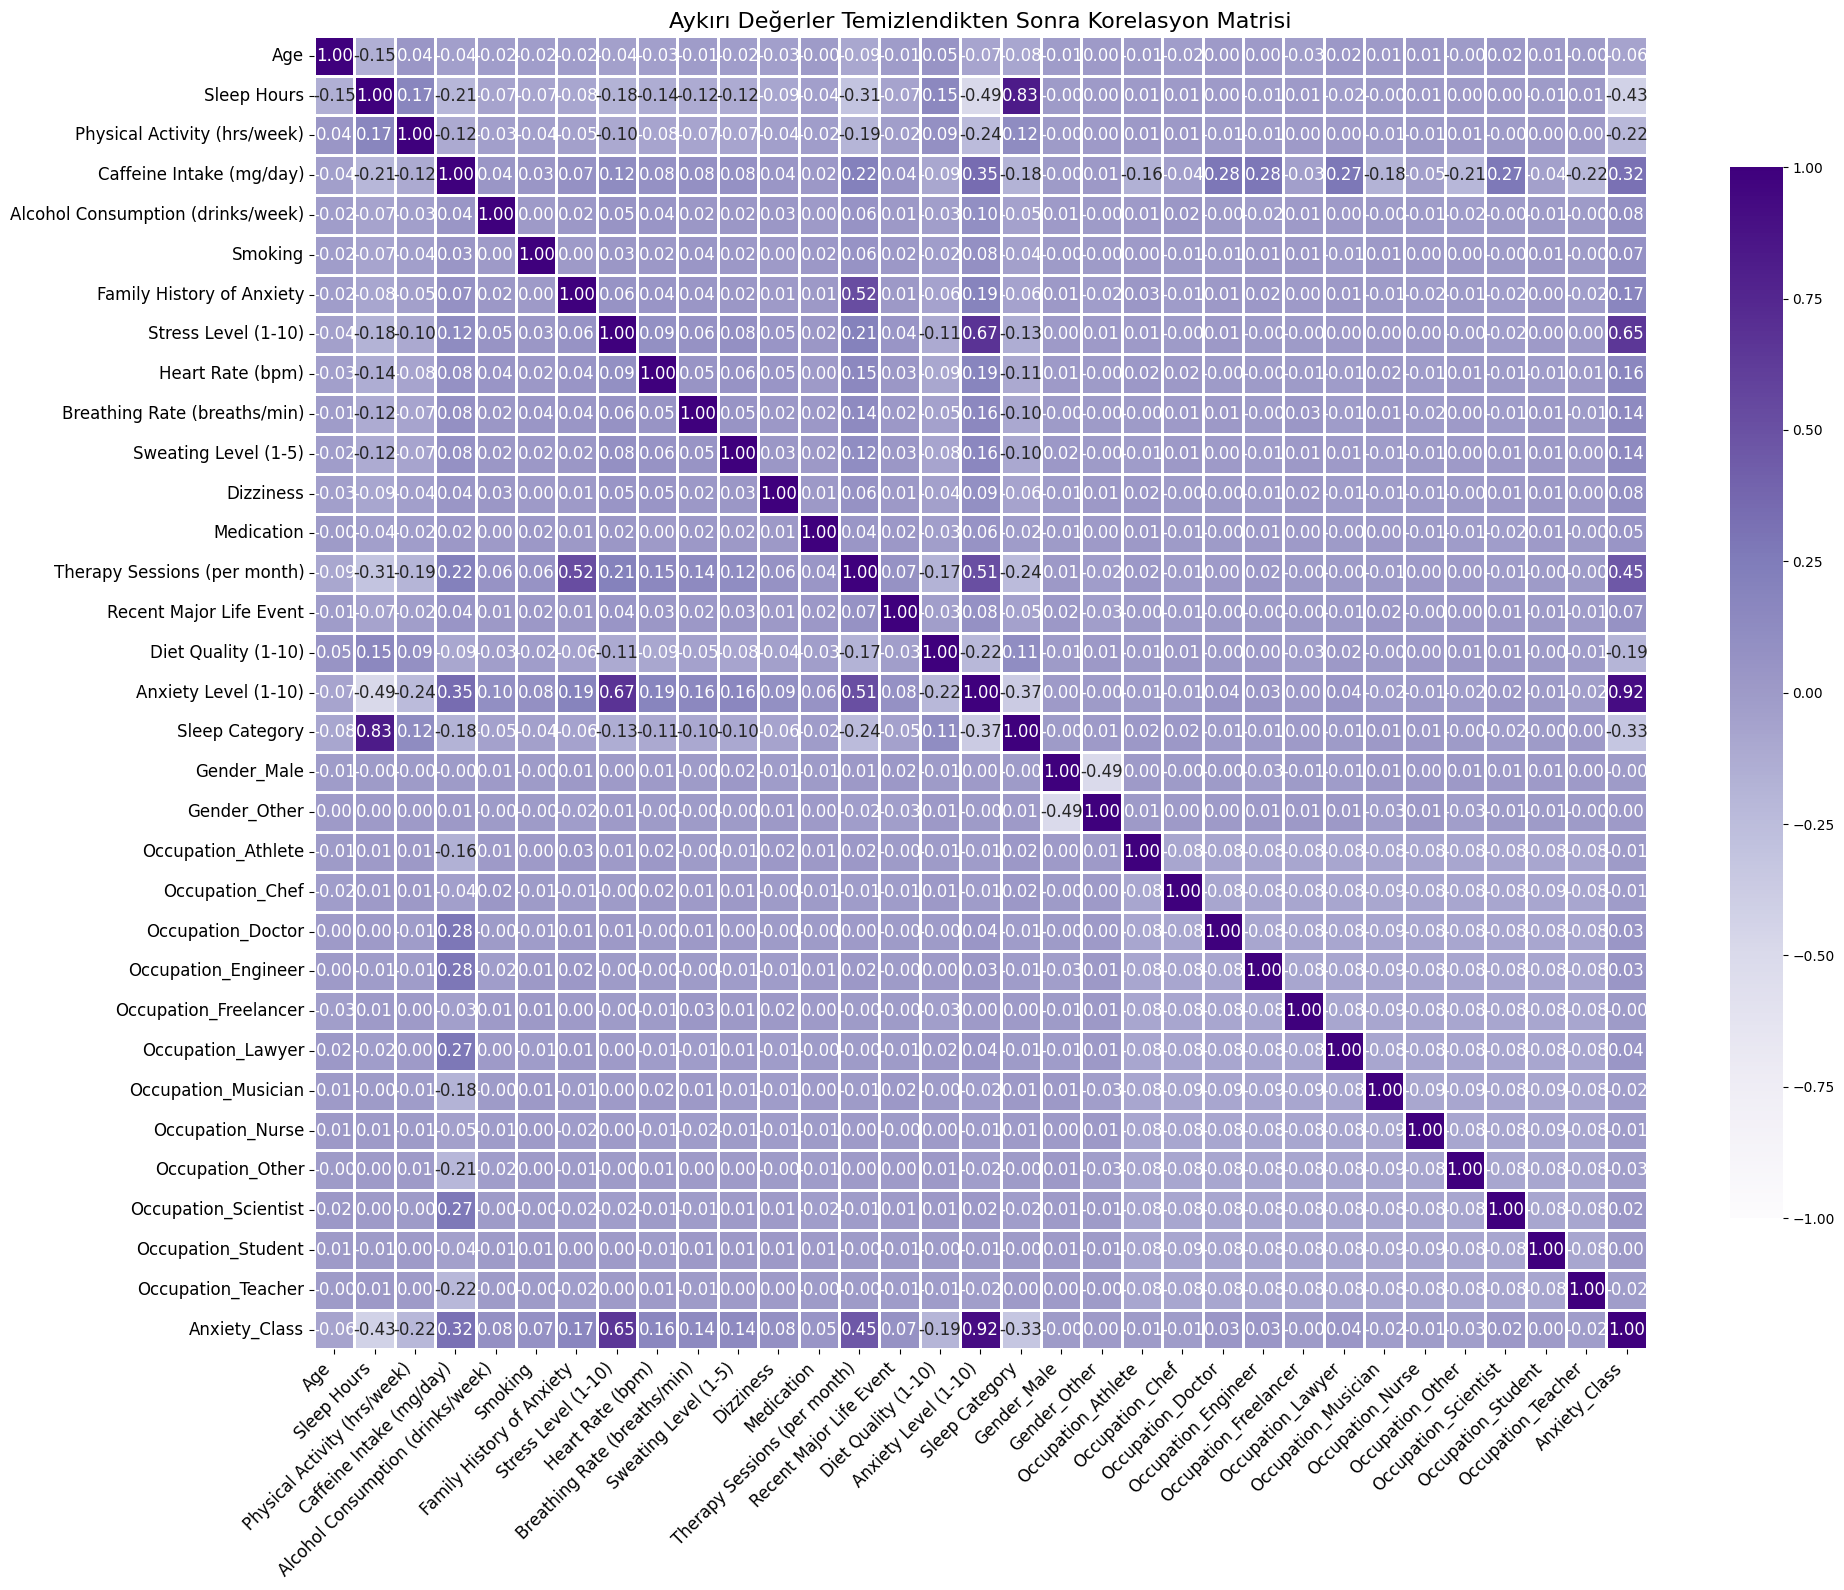

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Korelasyon matrisini al
corr = df.corr(numeric_only=True)

# Şekil boyutu
plt.figure(figsize=(20, 16))

# Isı haritası - Mor tonları ("Purples", "BuPu", "plasma" gibi cmap seçenekleri)
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="Purples",  # ← Mor tonları burada!
    vmin=-1,
    vmax=1,
    square=False,
    linewidths=1,
    linecolor='white',
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 12}
)

# Başlık ve stil ayarları
plt.title("Aykırı Değerler Temizlendikten Sonra Korelasyon Matrisi", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()




Önemli Bulgular ve Yorumlar:

📌 Anxiety Level (1-10) ile ilişkiler:

Stress Level (0.66): Yüksek pozitif korelasyon – stres arttıkça anksiyete de artıyor.

Therapy Sessions (0.45): Daha fazla terapi alanlar daha yüksek anksiyete düzeyine sahip. Bu durum, anksiyetesi yüksek olanların terapiye daha sık gittiğini gösterebilir.

Medication (0.37): İlaç kullanımı ile anksiyete arasında anlamlı pozitif ilişki var.

Sweating Level (0.19), Dizziness (0.16), Heart Rate (0.19) gibi fiziksel belirtilerle düşük ama pozitif korelasyon var.

💤 Sleep Hours:
Anxiety Level (-0.32): Daha az uyuyanlarda daha fazla anksiyete görülüyor.

Stress Level (-0.27): Uyku azaldıkça stres artıyor.

Caffeine Intake (-0.18): Kafein arttıkça uyku süresi azalıyor.

🏃 Physical Activity:
Anxiety Level (-0.24): Fiziksel aktivite arttıkça anksiyete düşüyor.

Stress Level (-0.25): Aktivite, stresi azaltma yönünde pozitif bir etkiye sahip olabilir.

🍷 Alcohol Consumption:
Stress Level (0.26) ve Anxiety Level (0.15) ile pozitif korelasyon var – alkol tüketimi arttıkça stres ve anksiyete artabilir.

❤️ Heart Rate:
Stress Level (0.14) ve Anxiety Level (0.19) ile düşük ama anlamlı korelasyon – kalp atış hızı artışı stres/anksiyete göstergesi olabilir.

In [ ]:
df.isnull().sum()

,0
Age,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0
Stress Level (1-10),0
Heart Rate (bpm),0
Breathing Rate (breaths/min),0


In [ ]:
#  En sık geçen kategoriyi bul
most_common = df["Sleep Category"].mode()[0]

#  Eksik kategoriyi bu kategori ile doldur
df["Sleep Category"] = df["Sleep Category"].fillna(most_common)

# Not: Sayısal değişkenlerde eksik değer varsa "median" kullanılır
#  Kategorik değişkenlerde ise "mode" kullanılır

# MODELLEME

In [ ]:
# StandartScaler ile sayısal değişkenleri ölçeklemeyi sağlar
# Kullanılmadı
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
numeric_cols_to_scale = [
    'Age',
    'Sleep Hours',
    'Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)',
    'Alcohol Consumption (drinks/week)',
    'Stress Level (1-10)',
    'Heart Rate (bpm)',
    'Breathing Rate (breaths/min)',
    'Sweating Level (1-5)',
    'Therapy Sessions (per month)',
    'Diet Quality (1-10)',
    # 'Anxiety Level (1-10)'  # Bu sütuna etiketleme yapılacaksa ÖNCE sınıflandır sonra ölçekle. Sınıflandırılma yapılacağı için ölçeklemeye dahil edilmesi
]

# Ölçekleme yapılamsının sebebi;
# Ölçekleme (Scaling)	Farklı büyüklükteki verileri benzer düzeye çekmek.
# StandardScaler,Veriyi ortalaması 0, std sapması 1 olan forma sokar.
# Neden yapılır, Modelin verileri adil şekilde değerlendirmesi için.


In [ ]:
# Hedef değişkeni tanımla
y = df["Anxiety_Class"]
# # low-0
# moderate-1
# high-2

# Kullanılacak özellikler
X = df.drop(columns=[
    "Anxiety_Class",               # Hedef
    "Anxiety Level (1-10)",        # Hedefin sayısal versiyonu
    "Sleep Category"               # Eğer Sleep Hours’tan türetildiyse
])

In [ ]:
#  Eğitim ve Test Setlerine Bölme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#  Sayısal Değişkenlerin Ölçeklendirilmesi. Daha önce yaptım
from sklearn.preprocessing import StandardScaler

# Ölçekleyici nesnesi
scaler = StandardScaler()

# 1. Kopyaları oluştur
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# 2. Sayısal sütunları ölçekle(eğitim seti üzerinde fit, her ikisine transform)
X_train_scaled[numeric_cols_to_scale] = scaler.fit_transform(X_train[numeric_cols_to_scale])
X_test_scaled[numeric_cols_to_scale] = scaler.transform(X_test[numeric_cols_to_scale])


# Modellerin Eğitilmesi ve Değerlendirilmesi

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# MODELLER
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

# SONUÇLARI TUTMAK İÇİN
results = []

# MODEL EĞİTİMİ VE DEĞERLENDİRME
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"🔹 {name}")
    print(f"   Accuracy: {acc:.4f}")
    print(f"   F1 Score (Macro): {f1:.4f}")
    print(f"   Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 50)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1_Score": f1
    })

# # OPSİYONEL: SONUÇLARI PANDAS TABLOSUNA DÖNÜŞTÜR
# import pandas as pd
# results_df = pd.DataFrame(results).sort_values(by="F1_Score", ascending=False)
# print("\n🔎 Karşılaştırma Tablosu:\n")
# print(results_df)


🔹 Logistic Regression
   Accuracy: 0.7891
   F1 Score (Macro): 0.8218
   Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1051
           1       0.73      0.77      0.75       906
           2       0.95      0.89      0.92       243

    accuracy                           0.79      2200
   macro avg       0.83      0.81      0.82      2200
weighted avg       0.79      0.79      0.79      2200

--------------------------------------------------
🔹 K-Nearest Neighbors
   Accuracy: 0.6164
   F1 Score (Macro): 0.6723
   Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63      1051
           1       0.55      0.50      0.53       906
           2       0.84      0.88      0.86       243

    accuracy                           0.62      2200
   macro avg       0.67      0.68      0.67      2200
weighted avg       0.61      0.62      0.61      2

✅ Model Model İnceleme:

🔹 Logistic Regression

Güçlü yönü: Dengeli, sınıflar arası tutarlı.

F1 Macro: 0.8218 → sınıflar arası iyi genel denge.

Sonuç: Basit ama başarılı.

🔹 Random Forest
Güçlü yönü: En yüksek F1 macro. Sınıf 2’de %100 precision.

Zayıf yönü: Biraz fazla öğrenmiş olabilir (class 2’de overfitting riski).

Sonuç: Performans kralı! Karmaşık ama güçlü.

🔹 XGBoost
Güçlü yönü: Random Forest’e yakın, çok yüksek class 2 başarımı.

Zayıf yönü: Biraz daha düşük accuracy.

Sonuç: Random Forest’in optimize edilmiş hâli gibi çalışıyor.

🔹 SVM
Güçlü yönü: Sınıf 0’da iyi.

Zayıf yönü: Sınıf 2’yi çok iyi öğrenememiş.

Sonuç: Sınıflar arası dengesiz başarı → zayıf seçim.

🔹 K-Nearest Neighbors
Güçlü yönü: Sınıf 2’de iyi.

Zayıf yönü: Genelde kötü sonuçlar.

Sonuç: Basit ama zayıf. Bu veri için uygun değil.



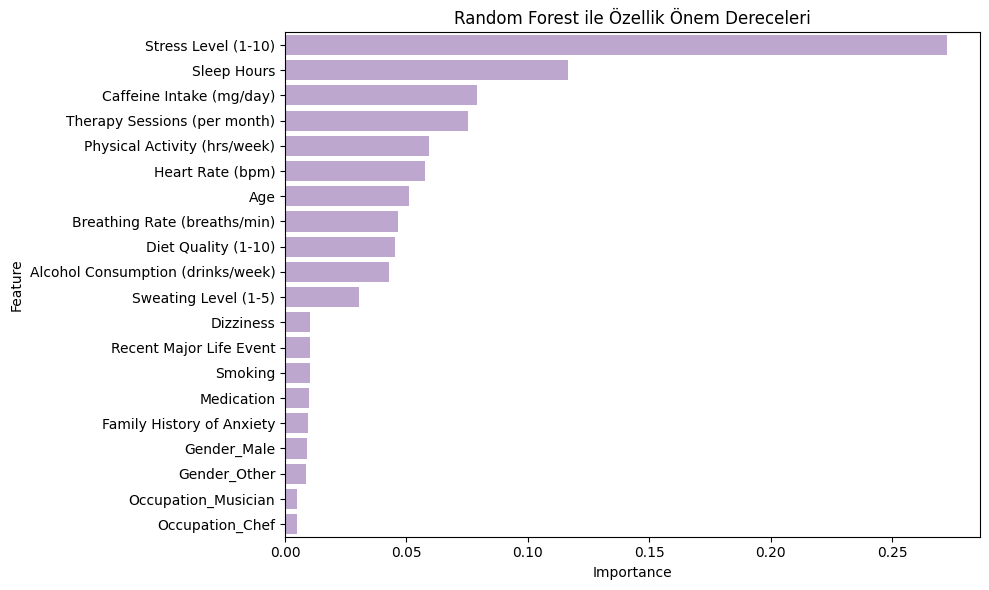

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Modeli eğit
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Özellik önemlerini al
importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Önem sırasına göre sırala
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), color='#BFA0D4')
plt.title("Random Forest ile Özellik Önem Dereceleri")
plt.tight_layout()
plt.show()


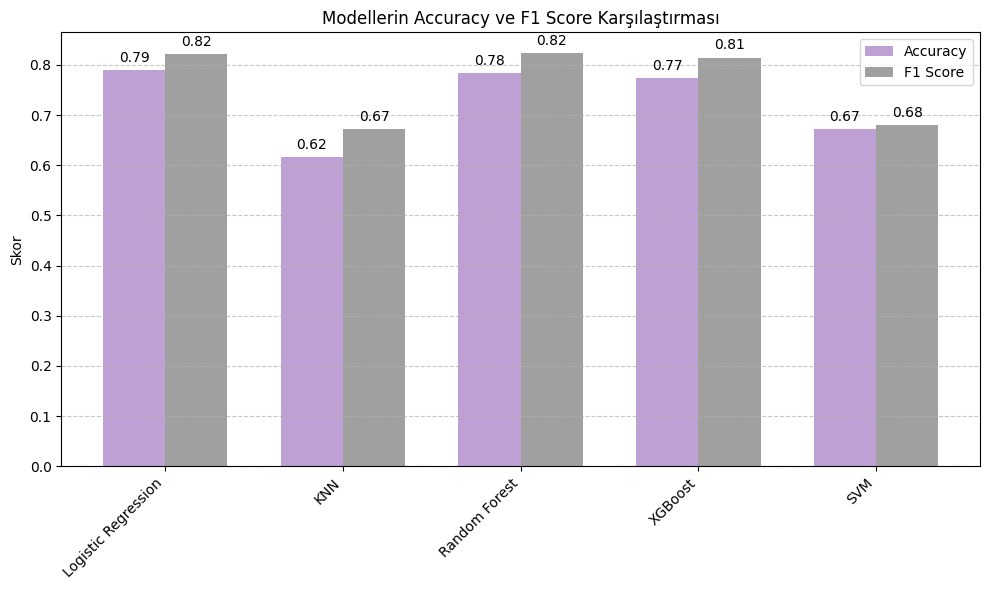

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Örnek: Daha önce elde ettiğin sonuçları kullanalım
model_names = ["Logistic Regression", "KNN", "Random Forest", "XGBoost", "SVM"]
accuracies = [0.7891,0.6164, 0.7845, 0.7736, 0.6727]
f1_scores = [0.8218, 0.6723, 0.8239, 0.8149,0.6802]

x = np.arange(len(model_names))  # model sayısı kadar index
width = 0.35  # çubuk genişliği
,
# Grafik
fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='#BFA0D4')
bars2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score', color='#A0A0A0')

# Etiketler ve başlıklar
ax.set_ylabel('Skor')
ax.set_title('Modellerin Accuracy ve F1 Score Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Çubukların üstüne skor yazalım
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

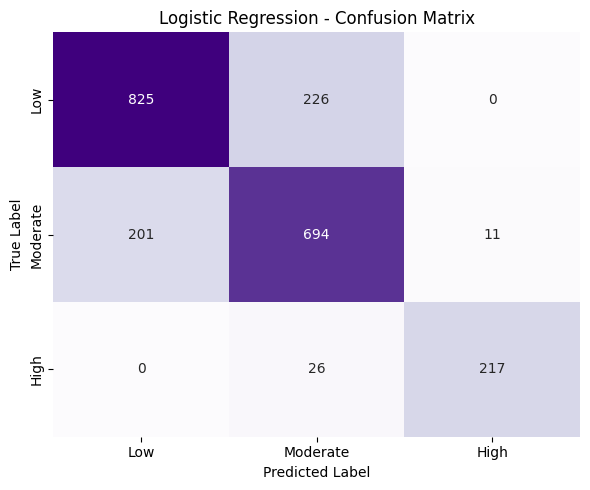

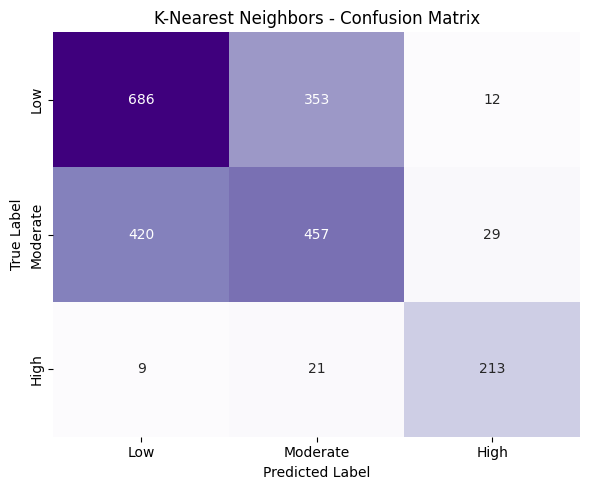

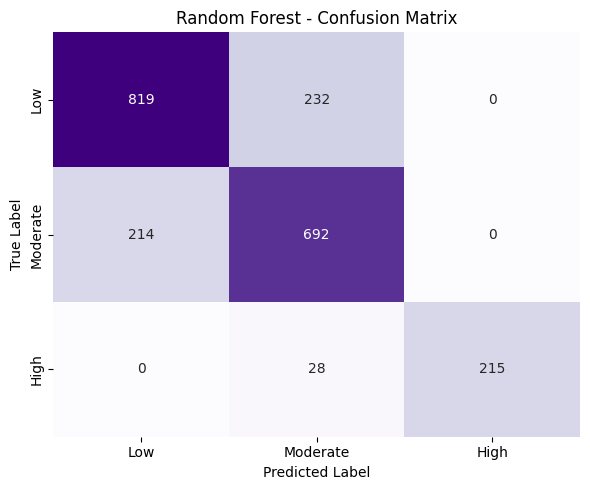

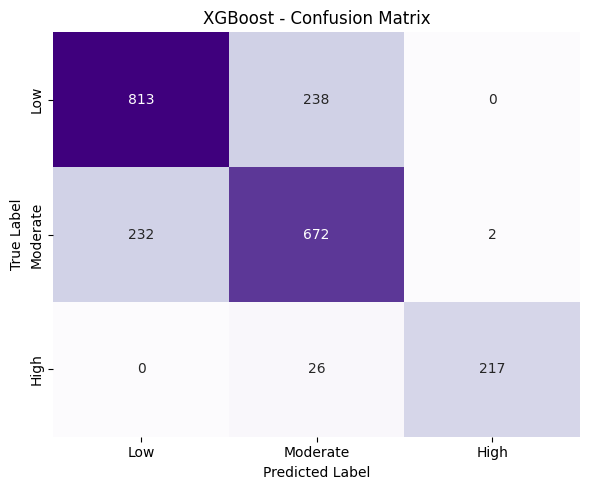

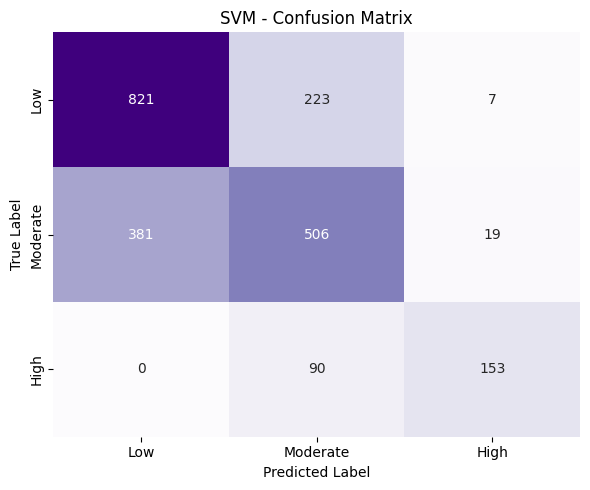

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Model listesini tanımlayalım
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "SVM": SVC()
}

# Sınıf adları
class_names = ["Low", "Moderate", "High"]

# Her model için confusion matrix çizimi
for name, model in models.items():
    # Modeli eğit
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix hesapla
    cm = confusion_matrix(y_test, y_pred)

    # Görselleştirme
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

✅ Sınıf Bazlı Doğruluk Analizi
🔹 Low (Gerçek "Low" sınıfındaki 243 kişi):
* 217 doğru tahmin edildi.

* 26 hata var (1 Moderate, 25 High).

* Doğruluk: 217 / 243 ≈ 89.3%

🔹 Moderate (Gerçek "Moderate" sınıfındaki 1051 kişi):
* 771 doğru tahmin edildi.

* 280 hata (1 Low, 279 High).

* Doğruluk: 771 / 1051 ≈ 73.4%

🔹 High (Gerçek "High" sınıfındaki 906 kişi):
* 630 doğru tahmin edildi.

* 276 hata (6 Low, 270 Moderate).


🧠 Genel Değerlendirme
* Model, "Low" sınıfını oldukça iyi tahmin ediyor.

* Ancak, "Moderate" ve "High" sınıfları arasında büyük karışıklık var. Bu, KNN modelinin bu iki sınıfı birbirinden ayırmakta zorlandığını gösteriyor.



📌 Sonuç

KNN modeli, Low sınıfını başarılı şekilde ayırt ediyor.

Ancak Moderate ve High sınıfları arasındaki ayrım zayıf, bu da kritik uygulamalarda güven problemi yaratabilir.

KNN yerine daha güçlü sınıflandırıcılar (Random Forest, XGBoost) veya karma modeller (ensemble) denenmesi önerilir.


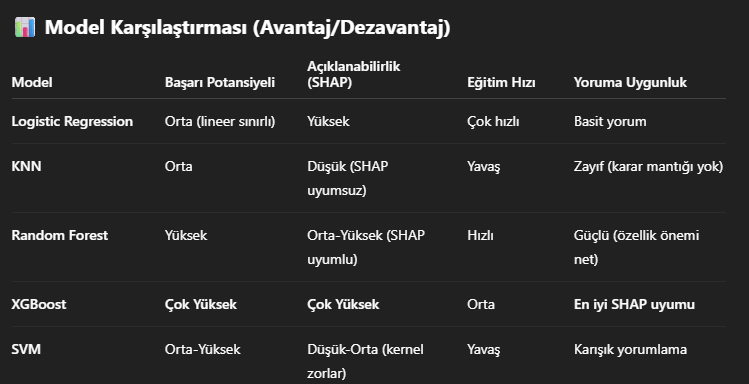

## Random Forest

🔹 Random Forest Model Performansı
   Accuracy: 0.7845
   F1 Score (Macro): 0.8239
   Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      1051
           1       0.72      0.77      0.75       906
           2       1.00      0.89      0.94       243

    accuracy                           0.78      2200
   macro avg       0.84      0.81      0.82      2200
weighted avg       0.79      0.78      0.79      2200



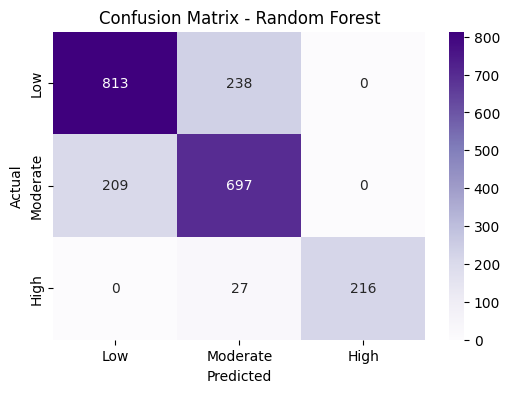

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modeli tanımla
rf_model = RandomForestClassifier(random_state=42)

# Modeli eğit
rf_model.fit(X_train, y_train)


# Tahmin yap
y_pred = rf_model.predict(X_test)

# Metrikler
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Yazdırma
print("🔹 Random Forest Model Performansı")
print(f"   Accuracy: {acc:.4f}")
print(f"   F1 Score (Macro): {f1:.4f}")
print("   Classification Report:\n", report)

# Confusion Matrix görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])  # Etiketleri manuel olarak belirleyin
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🔹 Random Forest Model Performansı

* Model, %78 doğruluk ve 0.82 F1-Macro skoru ile güçlü bir genel başarı sağladı.
Konfüzyon matrisine göre:

* Düşük ve Orta seviye tahminlerinde bazı karışıklıklar var (örn. 238 adet "Low", "Moderate" olarak tahmin edildi).

* Yüksek seviye anksiyete sınıfında başarı oldukça yüksek: 216 örnekten 216’sı doğru sınıflandı (F1: 0.94).

* Model, özellikle yüksek riskli bireyleri doğru sınıflamada başarılı oldu, bu da erken müdahale açısından avantaj sağlar.



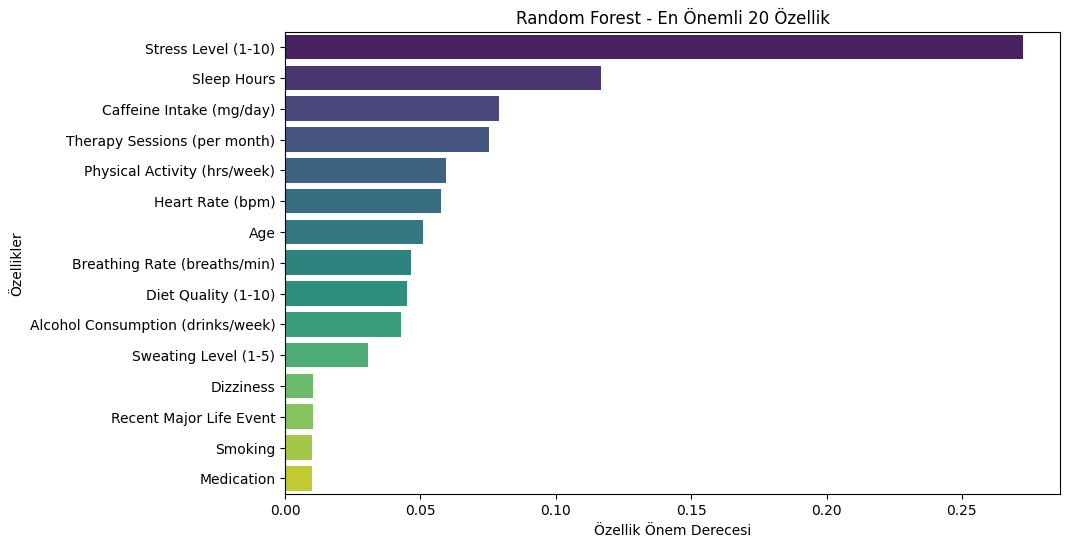

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Özelliklerin önem derecelerini al
feature_importances = rf_model.feature_importances_

# Özellik adlarını al (X_train'in sütun adlarını kullanarak)
feature_names = X_train.columns

# Özellik adları ve önem derecelerini birleştirip bir DataFrame oluştur
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Önem derecelerine göre sırala
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# En önemli 20 özelliği seç
top_20_features = importance_df.head(15)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title("Random Forest - En Önemli 20 Özellik")
plt.xlabel("Özellik Önem Derecesi")
plt.ylabel("Özellikler")
plt.show()


## XGBoost Model Performansı

🔹 XGBoost Model Performansı
   Accuracy: 0.7736
   F1 Score (Macro): 0.8149
   Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78      1051
           1       0.72      0.74      0.73       906
           2       0.99      0.89      0.94       243

    accuracy                           0.77      2200
   macro avg       0.83      0.80      0.81      2200
weighted avg       0.78      0.77      0.77      2200



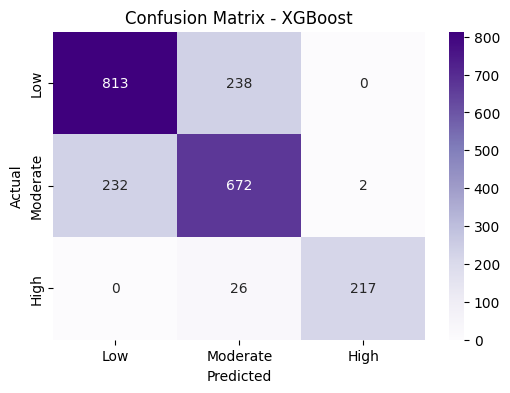

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modeli tanımla
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Modeli eğit
xgb_model.fit(X_train, y_train)

# Tahmin yap
y_pred = xgb_model.predict(X_test)

# Metrikler
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Yazdırma
print("🔹 XGBoost Model Performansı")
print(f"   Accuracy: {acc:.4f}")
print(f"   F1 Score (Macro): {f1:.4f}")
print("   Classification Report:\n", report)

# Confusion Matrix görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])  # Etiketleri manuel olarak belirleyin
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



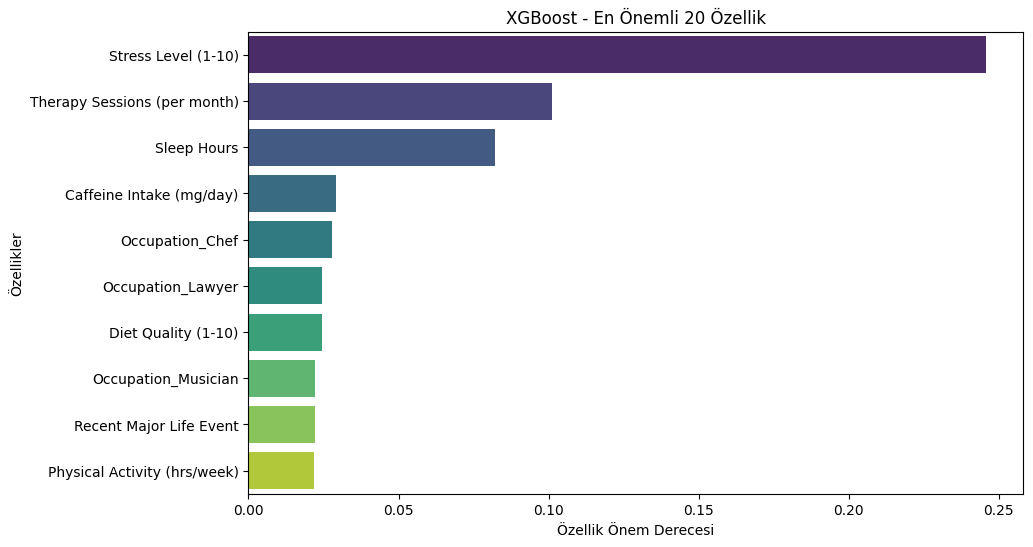

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost modelinden özelliklerin önem derecelerini al
feature_importances = xgb_model.feature_importances_

# Özellik adlarını al (X_train'in sütun adlarını kullanarak)
feature_names = X_train.columns

# Özellik adları ve önem derecelerini birleştirip bir DataFrame oluştur
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Önem derecelerine göre sırala
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# En önemli 20 özelliği seç
top_20_features = importance_df.head(10)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title("XGBoost - En Önemli 20 Özellik")
plt.xlabel("Özellik Önem Derecesi")
plt.ylabel("Özellikler")
plt.show()


## Shap ile Model Yorumlama

In [ ]:
!pip install shap

In [ ]:
import shap
# SHAP explainer'ı oluştur. Random Forest kullanıldı.
explainer_rf = shap.TreeExplainer(rf_model)

# SHAP değerlerini hesapla (bu işlem biraz zaman alabilir)
shap_values_rf = explainer_rf.shap_values(X_test)

# Önem grafiğini çiz (sınıf 0, 1, 2 için ayrı ayrı veya genel ortalama)
# shap.summary_plot(shap_values_rf, X_test, plot_type="bar")


# SHAP (SHapley Additive exPlanations), bir makine öğrenmesi modelinin her tahmininin nasıl oluştuğunu açıklamak için kullanılan güçlü bir araçtır. Modelin bir özelliği (örneğin “Sleep Hours”) tahmine ne kadar katkı sağladı sorusunun cevabını verir.

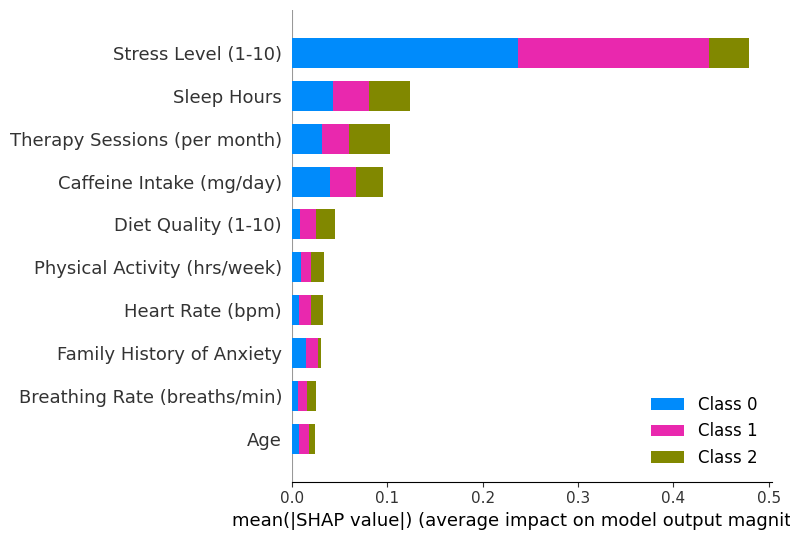

In [ ]:
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", max_display=10)



🔍 SHAP Özellik Etkisi - Sınıf: Low


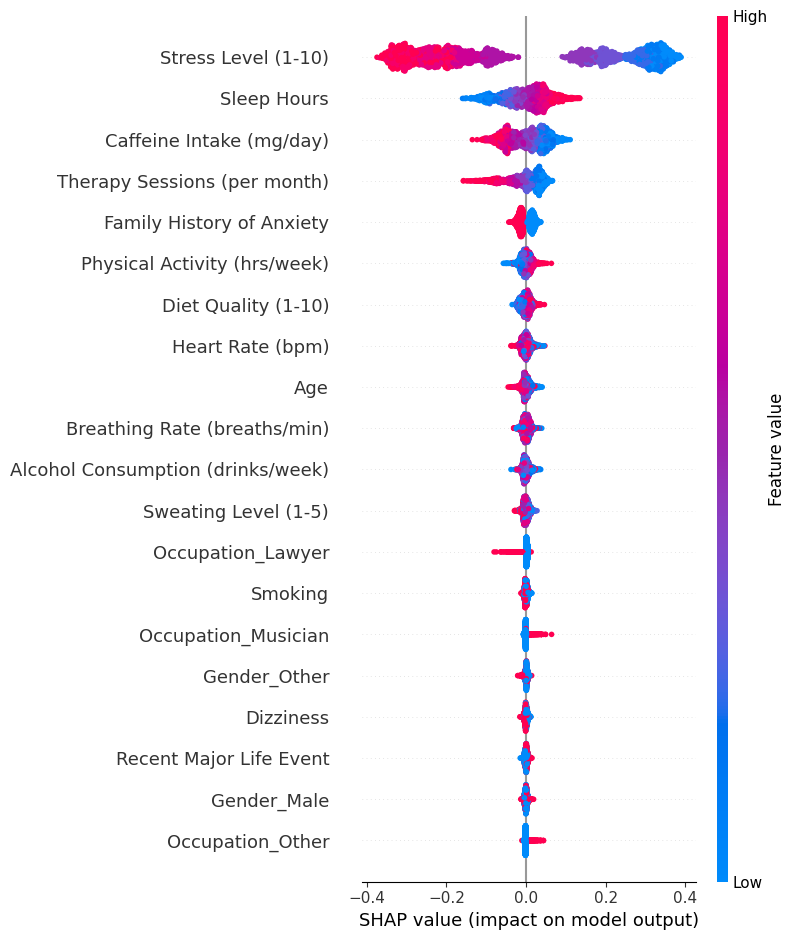


🔍 SHAP Özellik Etkisi - Sınıf: Moderate


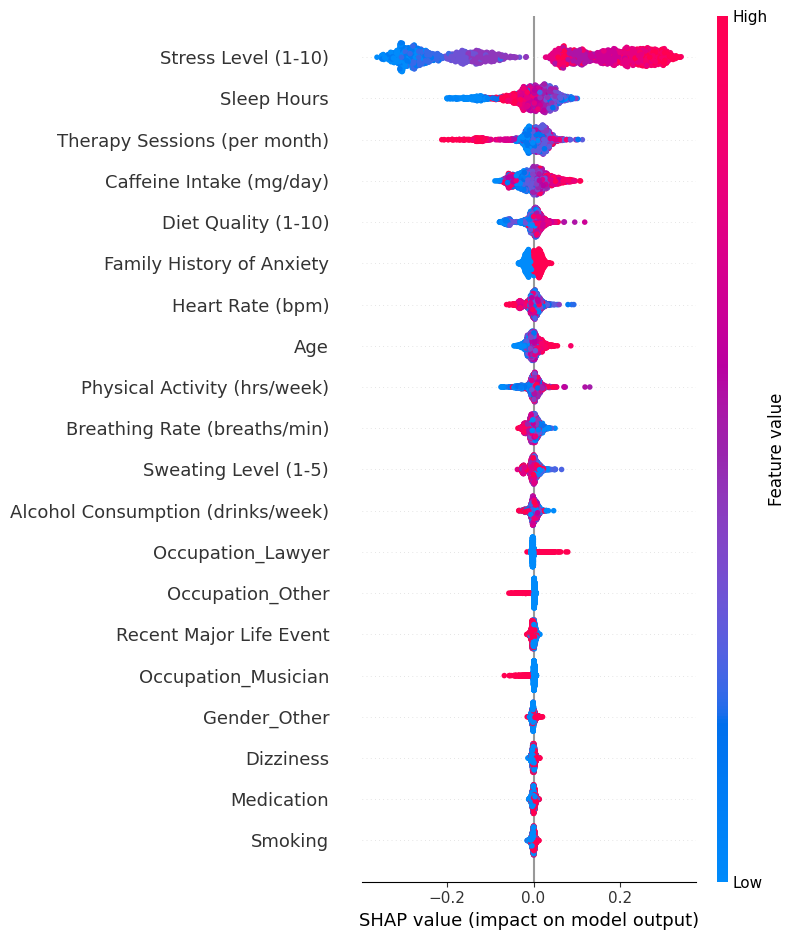


🔍 SHAP Özellik Etkisi - Sınıf: High


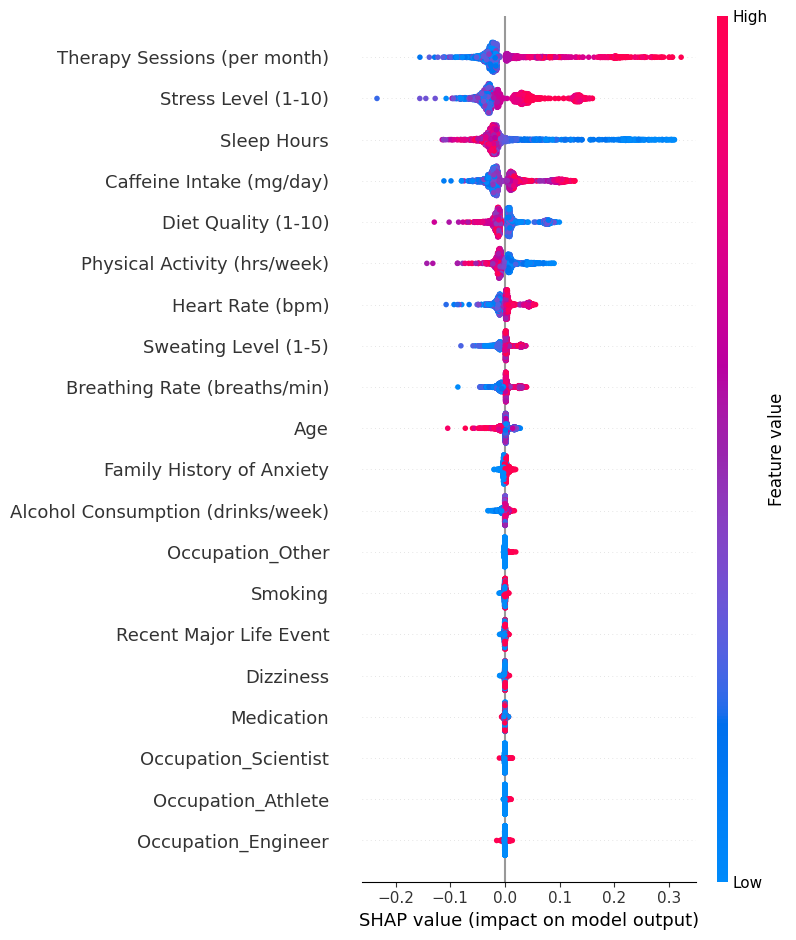

In [ ]:
import shap

# SHAP açıklayıcıyı tanımla
explainer = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)



# Her sınıf için ayrı summary dot plot çizdir
for i in range(len(class_names)):
    print(f"\n🔍 SHAP Özellik Etkisi - Sınıf: {class_names[i]}")
    shap.summary_plot(shap_values_rf[:, :, i], X_test, plot_type="dot", show=True)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
import joblib

# Özellikler
selected_features = [
    "Stress Level (1-10)",
    "Therapy Sessions (per month)",
    "Medication",
    "Family History of Anxiety",
    "Sleep Hours",
    "Sleep Category",
    "Physical Activity (hrs/week)",
    "Caffeine Intake (mg/day)",
    "Diet Quality (1-10)",
    "Alcohol Consumption (drinks/week)",
    "Recent Major Life Event",

]


# Veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GridSearch parametreleri
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

# Model oluştur ve eğit
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# En iyi modeli al
best_rf = grid_search.best_estimator_

# Test doğruluğu
y_pred = best_rf.predict(X_test_scaled)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("🎯 F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("📊 Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# Modeli ve scaler'ı kaydet
joblib.dump(best_rf, "/content/drive/MyDrive/tekrarDers/rf_Grid_models.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/tekrarDers/sele2_scaler.pkl")

# Modelin beklediği sütun sırasını da kaydet
model_features = X.columns.tolist()
joblib.dump(model_features, "/content/drive/MyDrive/tekrarDers/model_features.pkl")


# Not: GridSearc, cross-validation kullanarak performansı test eder.
# Cross-validation, veri kümesini birden fazla parçaya (katlara) ayırarak, modelin her parça üzerinde test edilmesini sağlar. Amaç, modelin gerçek dünyada nasıl performans göstereceğini daha iyi tahmin etmektir.

🎯 Accuracy: 0.7795454545454545
🎯 F1 Score: 0.7810743467704779
📊 Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      1051
           1       0.72      0.77      0.74       906
           2       1.00      0.89      0.94       243

    accuracy                           0.78      2200
   macro avg       0.84      0.81      0.82      2200
weighted avg       0.78      0.78      0.78      2200



['/content/drive/MyDrive/tekrarDers/model_features.pkl']

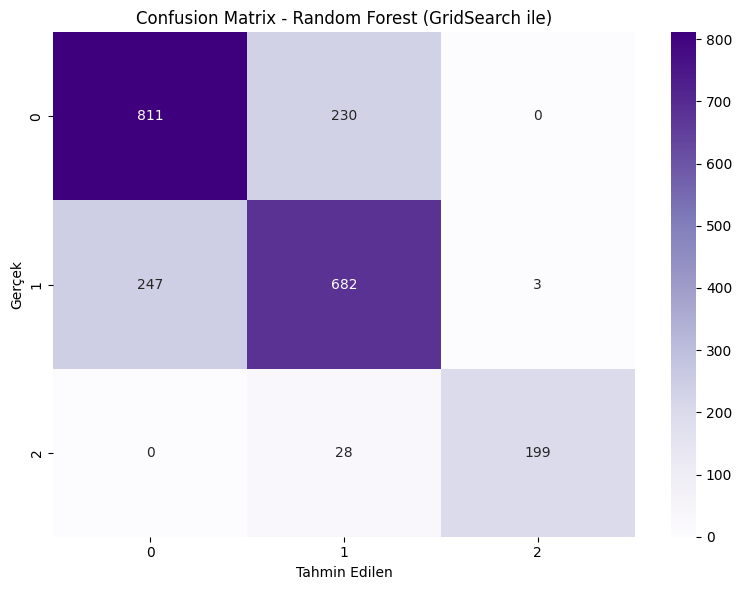

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Sınıf isimleri varsa onları kullan, yoksa sayısal olarak ver
class_names = sorted(y_test.unique()) if hasattr(y_test, 'unique') else sorted(set(y_test))

# Görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Random Forest (GridSearch ile)")
plt.tight_layout()
plt.show()


 **Genel Değerlendirme:**

Model genel olarak iyi iş çıkarıyor, özellikle sınıf 2’yi ayırt etme konusunda çok başarılı.

Ancak sınıf 0 ve 1 arasında belirgin bir karışıklık var. Bu karışıklığı azaltmak için:

🛠 Öneriler:
Stress Level, Sleep Hours, Caffeine, Therapy gibi özellikleri SHAP/FI ile yeniden analiz edip önemlerini gözden geçirmek

Yeni özellikler türetmek veya mevcut özellikleri yeniden dönüştürmek (örneğin: Stress/Sleep oranı gibi)

Model karmaşıklığını artırmak (örneğin: daha derin ağaçlar veya boosting yöntemleri denemek)

🔍 Değerlendirme:

* Performans düşüşü tüm modellerde görülüyor; özellikle F1 skoru %5–6 civarı geriliyor.

* Bu fark, "Anxiety Level (1-10)" özelliğinin hedef değişkenle yüksek korelasyonuna (0.92) bağlı.

* Yine de, çıkarılan özellikler yalnızca bir taneyse ve etik/dinamik nedenlerle kullanılmıyorsa, modeller hâlâ makul düzeyde performans gösteriyor.

* SVM ve Logistic Regression, seçili özelliklerle bile güçlü ve istikrarlı sonuç veriyor.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Eğitim ve test böl (zaten bu kısım sende hazırdı)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# ✔️ Rastgele 5 kişi seç
random_5 = X.sample(5, random_state=42)
random_5_scaled = scaler.transform(random_5)

# Tahmin olasılıklarını al
probabilities = model.predict_proba(random_5_scaled)
predictions = model.predict(random_5_scaled)

# Sonuçları görselleştir
results = random_5.copy()
results["Tahmin"] = predictions
results["Olasılık_0 (Düşük)"] = (probabilities[:, 0] * 100).round(2)
results["Olasılık_1 (Orta)"] = (probabilities[:, 1] * 100).round(2)
results["Olasılık_2 (Yüksek)"] = (probabilities[:, 2] * 100).round(2)

# Sütunları düzenli göster
columns_to_show = list(random_5.columns) + ["Tahmin", "Olasılık_0 (Düşük)", "Olasılık_1 (Orta)", "Olasılık_2 (Yüksek)"]

print("🔍 Rastgele 5 Kişi İçin Anksiyete Tahmini:\n")
print(results[columns_to_show])

🔍 Rastgele 5 Kişi İçin Anksiyete Tahmini:

      Age  Sleep Hours  Physical Activity (hrs/week)  \
107    35          7.7                           4.6   
5484   42          6.3                           5.4   
6998   46          5.4                           0.2   
3984   23          6.7                           1.1   
3111   26          6.4                           3.8   

      Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Smoking  \
107                        561                                  8        0   
5484                       208                                 17        1   
6998                       367                                  9        0   
3984                       290                                  3        1   
3111                        36                                  4        1   

      Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm)  \
107                           0                   10                87   
548

In [ ]:
import pandas as pd
import numpy as np

# 🔁 Veriden rastgele 5 kişi seç
random_5 = X.sample(5, random_state=42)
random_5_scaled = scaler.transform(random_5)

# 🎯 Model tahmini
predictions = model.predict(random_5_scaled)
probabilities = model.predict_proba(random_5_scaled)

# 🧾 Sonuçları birleştir
results = random_5.copy()
results["Tahmin (Kaygı Seviyesi)"] = predictions

# Olasılıkları ekle (sınıf sayısına göre otomatik)
for i in range(probabilities.shape[1]):
    results[f"Olasılık_{i} (Seviye {i})"] = (probabilities[:, i] * 100).round(2)

# 📊 Sonuçları göster
print("🔍 Kendi Modelinle 5 Kişilik Kaygı Tahmini:\n")
print(results)


🔍 Kendi Modelinle 5 Kişilik Kaygı Tahmini:

      Age  Sleep Hours  Physical Activity (hrs/week)  \
107    35          7.7                           4.6   
5484   42          6.3                           5.4   
6998   46          5.4                           0.2   
3984   23          6.7                           1.1   
3111   26          6.4                           3.8   

      Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Smoking  \
107                        561                                  8        0   
5484                       208                                 17        1   
6998                       367                                  9        0   
3984                       290                                  3        1   
3111                        36                                  4        1   

      Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm)  \
107                           0                   10                87   
54